# Visualising Distributions of Data

In this section, we will see how to: 
- Visualise univariate distributions
- Visualise bivariate distributions

We will also start using the ```seaborn``` library for data visualisation. Seaborn is a python library built on top of ```matplotlib```. It creates much more attractive plots than ```matplotlib```, and is often more concise than ```matplotlib``` when you want to customize your plots, add colors, grids etc.

Let's start with univariate distributions.

## Visualising Univariate Distributions

We have already visualised univariate distributions before using boxplots, histograms etc. Let's now do that using seaborn. We'll use the sales data for the upcoming few exercises.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# the commonly used alias for seaborn is sns
import seaborn as sns

# set a seaborn style of your taste
sns.set_style("whitegrid")

# data
df = pd.read_csv("./global_sales_data/market_fact.csv")
df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.15,0.08,35,1219.87,26.30,0.38


### Histograms and Density Plots

Histograms and density plots show the frequency of a numeric variable along the y-axis, and the value along the x-axis. The ```sns.distplot()``` function plots a density curve. Notice that this is aesthetically better than vanilla ```matplotlib```.

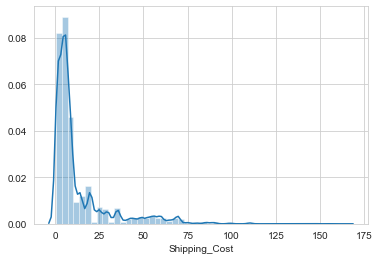

In [2]:
# simple density plot
sns.distplot(df['Shipping_Cost'])
plt.show()

You can also plot what is known as the **rug plot** which plots the actual data points as small vertical bars. The rug plot is simply specified as an argument of the ```distplot()```.

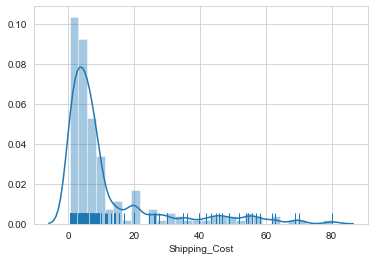

In [6]:
# rug = True
# plotting only a few points since rug takes a long while
sns.distplot(df['Shipping_Cost'][:200],rug=True)
plt.show()

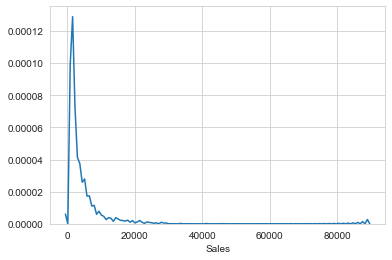

In [7]:
sns.distplot(df['Sales'], hist=False)
plt.show()

Since seaborn uses matplotlib behind the scenes, the usual matplotlib functions work well with seaborn. For example, you can use subplots to plot multiple univariate distributions.

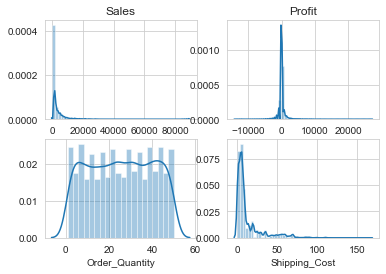

In [9]:
# subplots

# subplot 1
plt.subplot(2, 2, 1)
plt.title('Sales')
sns.distplot(df['Sales'])

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Profit')
sns.distplot(df['Profit'])

# subplot 3
plt.subplot(2, 2, 3)
# plt.title('Order Quantity')
sns.distplot(df['Order_Quantity'])

# subplot 4
plt.subplot(2, 2, 4)
# plt.title('Shipping Cost')
sns.distplot(df['Shipping_Cost'])

plt.show()


### Boxplots

Boxplots are a great way to visualise univariate data because they represent statistics such as the 25th percentile, 50th percentile, etc.

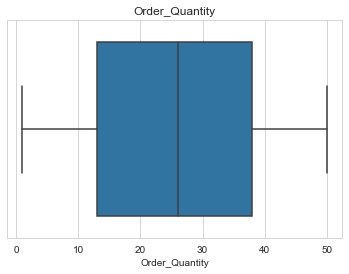

In [10]:
#boxplot

sns.boxplot(df['Order_Quantity'])
plt.title('Order_Quantity')
plt.show()

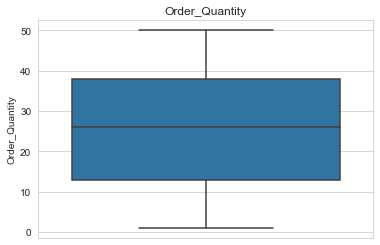

In [11]:
# to plot the values on the vertical axis, specify y=variable

sns.boxplot(y=df['Order_Quantity'])
plt.title('Order_Quantity')
plt.show()

## Visualising Bivariate Distributions

Bivariate distributions are simply two univariate distributions plotted on x and y axes respectively. They help you observe the relationship between the two variables.

They are also called joint distributions and are created using ```sns.jointplot()```.


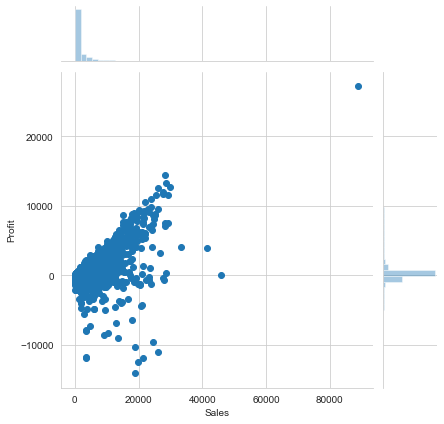

In [12]:
# joint plot for sales and profit

sns.jointplot('Sales','Profit', df)
plt.show()

Notice that both the distributions are heavily skewed and all the points seem to be concentrated in one region. That is because of some extreme values of Profits and Sales which matplotlib is trying to accomodate in the limited space of the plot.

Let's remove that point and plot again.


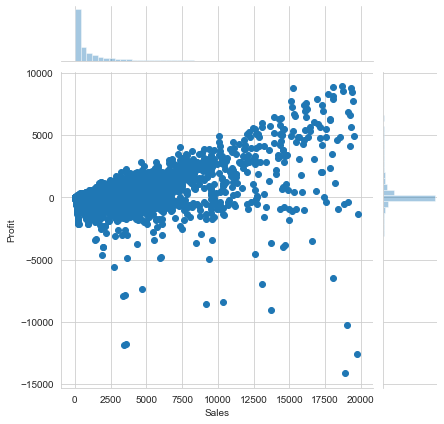

In [13]:
# remove points having extreme values
df = df[(df.Profit < 10000) & (df.Sales < 20000)]

sns.jointplot('Sales', 'Profit', df)
plt.show()

